In [8]:
import pandas as pd
import os
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

dataset_path = kagglehub.dataset_download("artyomkruglov/gaming-profiles-2025-steam-playstation-xbox")

steam_folder = os.path.join(dataset_path, "steam")

df = pd.read_csv(os.path.join(steam_folder, "players.csv"))

df.head()


,playerid,country,created
0,76561198287452552,Brazil,2016-03-02 06:14:20
1,76561198040436563,Israel,2011-04-10 17:10:06
2,76561198049686270,NaN,2011-09-28 21:43:59
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47
4,76561198119605821,NaN,2013-12-26 00:25:50


In [9]:
df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424683 entries, 0 to 424682
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playerid  424683 non-null  int64 
 1   country   246815 non-null  object
 2   created   377014 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.7+ MB


,0
playerid,0
country,177868
created,47669


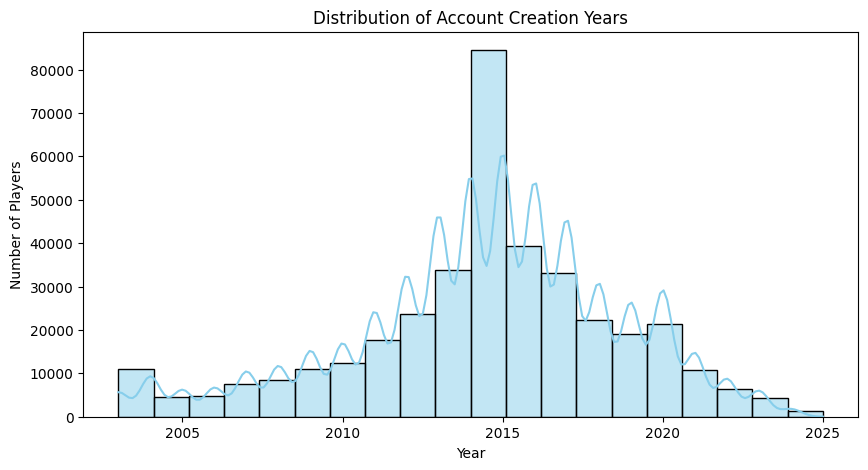

In [10]:

df['created'] = pd.to_datetime(df['created'], errors='coerce')

df['created_year'] = df['created'].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df['created_year'].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Distribution of Account Creation Years")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()


<ipython-input-11-a048d69b79a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


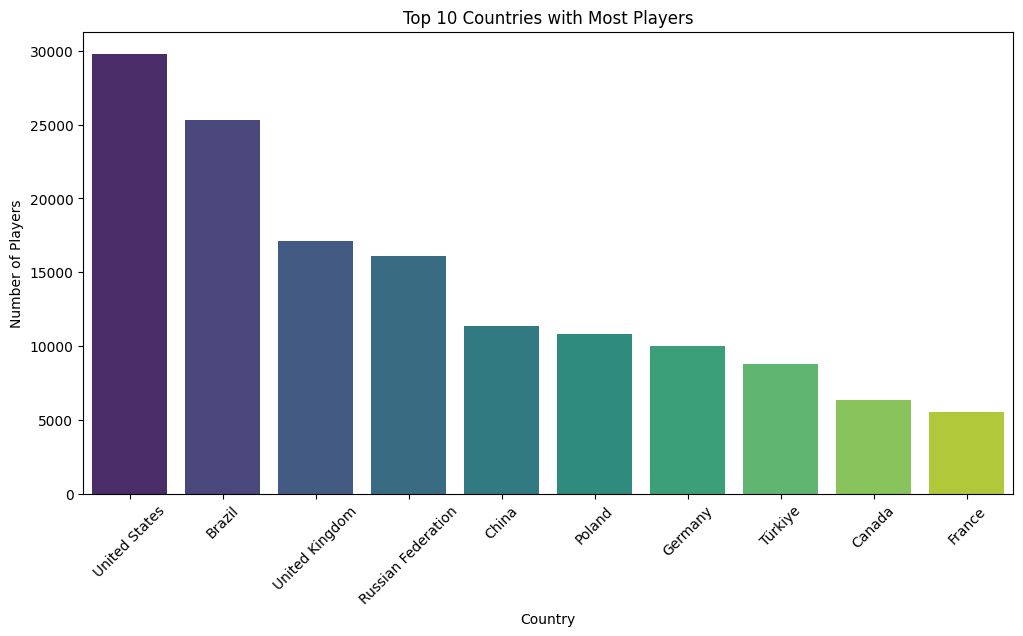

In [11]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries with Most Players")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x500 with 0 Axes>

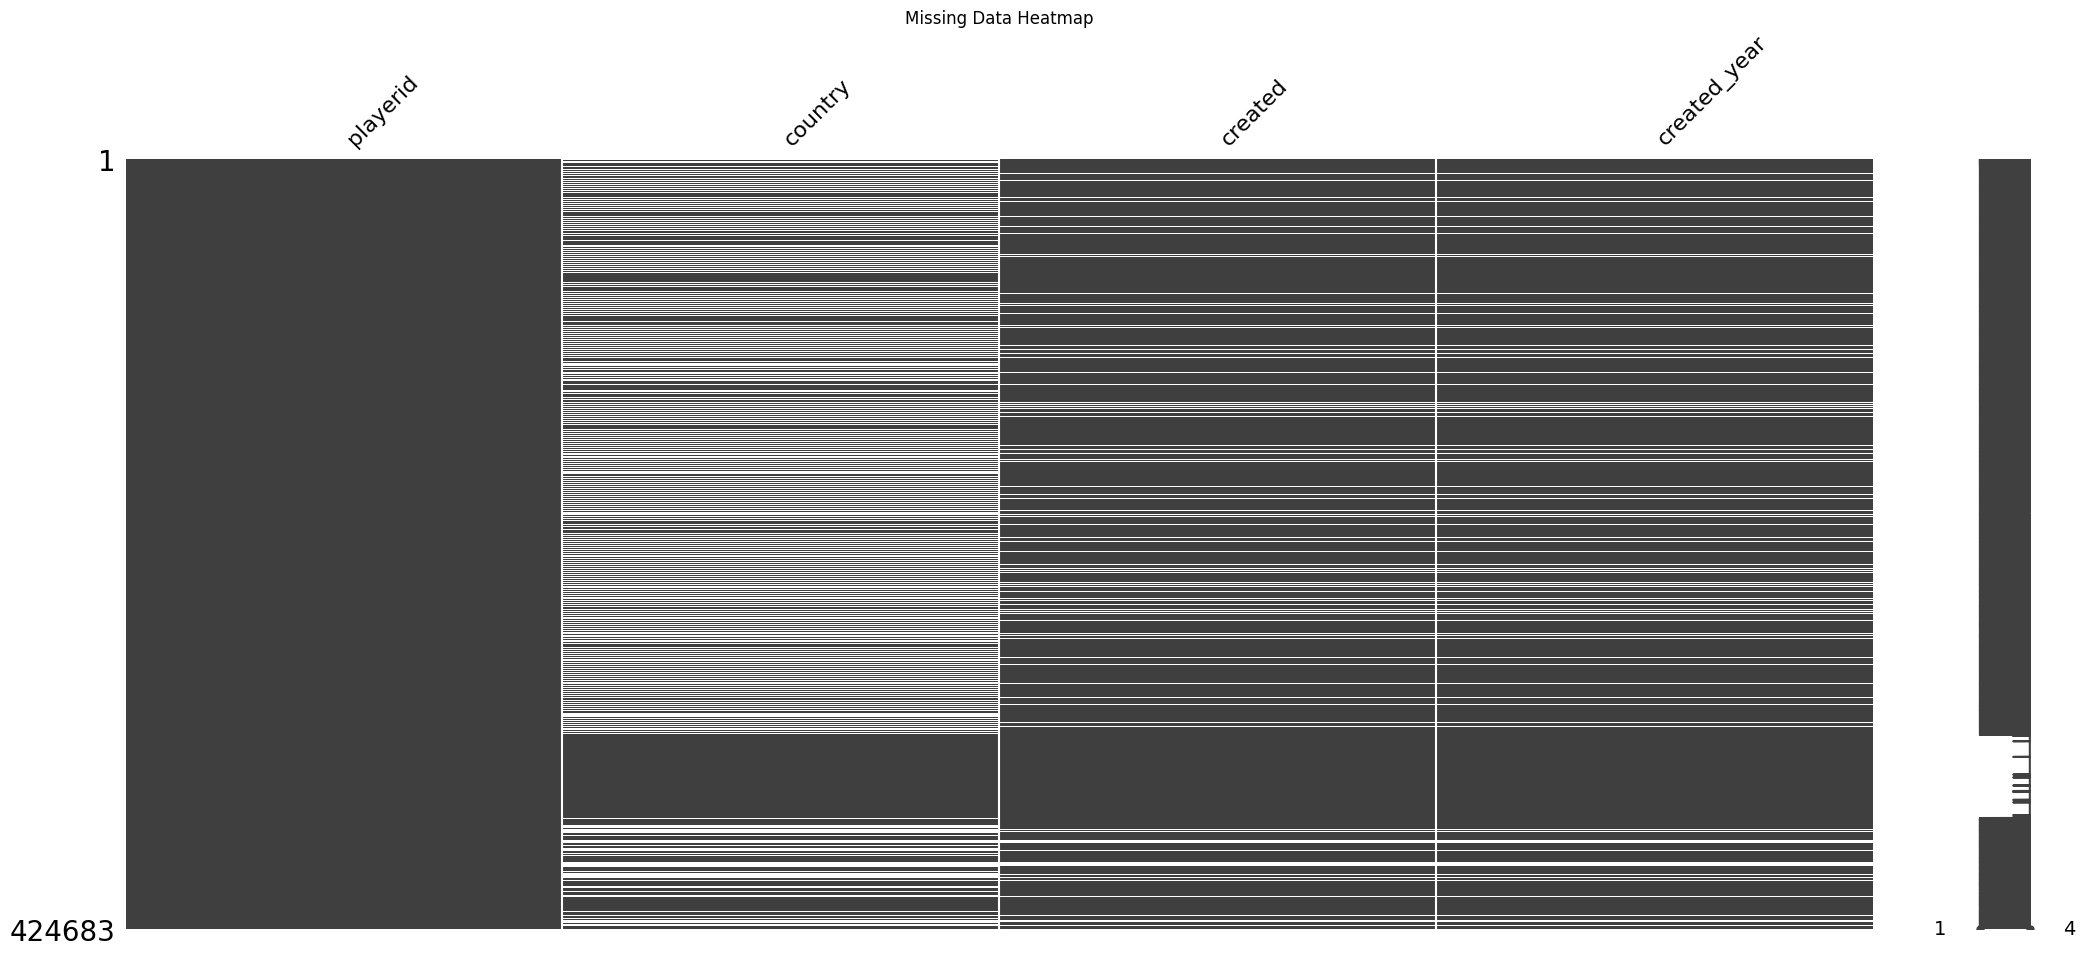

In [12]:
import missingno as msno

plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title("Missing Data Heatmap")
plt.show()


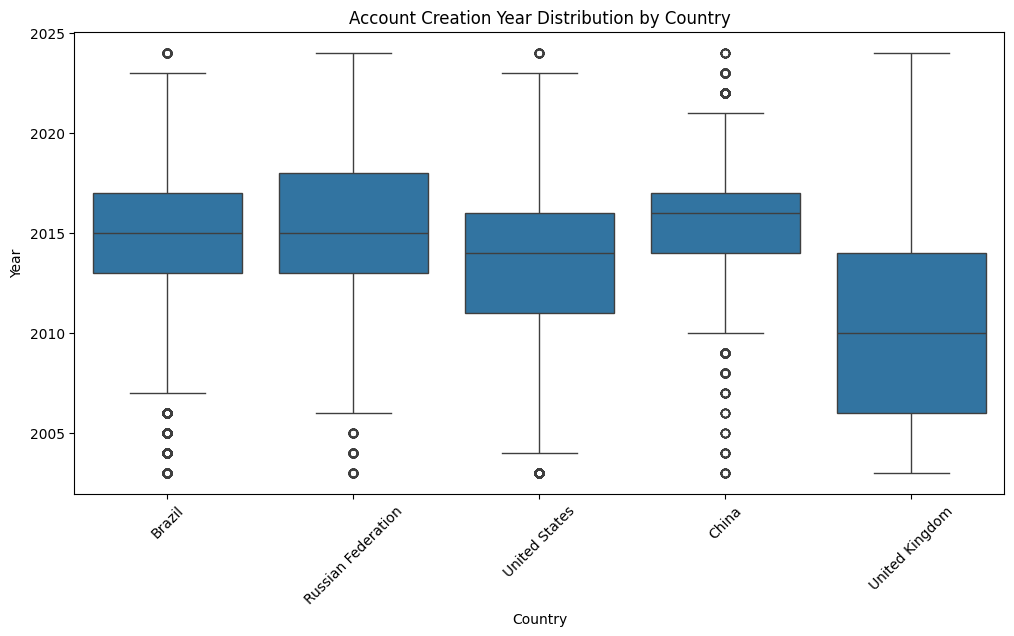

In [13]:
top_5_countries = df['country'].value_counts().head(5).index
filtered_df = df[df['country'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="country", y="created_year", data=filtered_df)
plt.title("Account Creation Year Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()
